# Zolotarev Anton, BST183. Final Test

File - Telco_segm2.sav

Clustering method - Hierarchical, num of clusters = 7

Classification method - Logistic regression

Variables - CALL_SMS_OUT_CNT_R (log10), LOG_CALLS_CNT, LOG_SMS_CNT, LOG_DATA_TRAFFIC_MB

# Data transformation

* Transform one variable from your set of variables by use of Log10 function.
* Add small positive value to the original variable (0.01) to avoid missing values in the transformed variable.
* Compare distributions of the original and transformed variables.

Let's open data file, and then add small positive value to 'CALL_SMS_OUT_CNT_R' before logarithmization. 

In [5]:
import pandas as pd
import numpy as np

data = pd.read_spss(r'C:\Users\zolotarev\Downloads\Telco_Segm_2.sav')
data = data[['CALL_SMS_OUT_CNT_R', 'LOG_CALLS_CNT', 'LOG_SMS_CNT', 'LOG_DATA_TRAFFIC_MB']]
data['LOG_CALL_SMS_OUT_CNT_R'] = np.log10(data['CALL_SMS_OUT_CNT_R']+0.001)
data

,CALL_SMS_OUT_CNT_R,LOG_CALLS_CNT,LOG_SMS_CNT,LOG_DATA_TRAFFIC_MB,LOG_CALL_SMS_OUT_CNT_R
0,21.000000,2.503791,2.454845,2.371306,1.322240
1,0.000000,2.374748,2.371068,2.371068,-3.000000
2,0.000000,2.913284,2.460898,2.371068,-3.000000
3,5.014493,3.461948,3.542203,3.769534,0.700314
4,32.277778,3.326541,2.959518,4.832665,1.508917
...,...,...,...,...,...
1467,0.000000,2.469822,2.646404,2.371068,-3.000000
1468,60.000000,3.175222,2.980003,4.311307,1.778158
1469,13.657895,3.487845,2.968016,4.752391,1.135416
1470,30.250000,2.885926,2.611723,4.752026,1.480740


Let's compare kernel density distribution of variable 'CALL_SMS_OUT_CNT_R' before and after logarithmization.

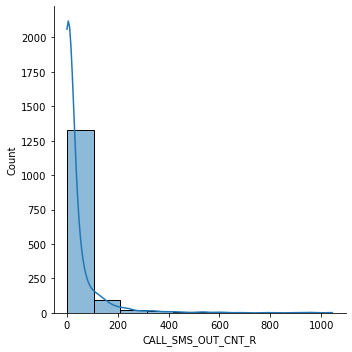

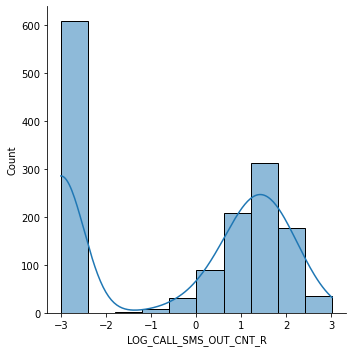

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data['CALL_SMS_OUT_CNT_R'], kde=True, bins=10)
sns.displot(data['LOG_CALL_SMS_OUT_CNT_R'], kde=True, bins=10)

# Cluster analysis

* Perform cluster analysis.
* Analyze the results: cluster sizes, measure of quality of cluster solution, compare cluster profiles.
* Use clustering variables plus additional variable CHARGE in cluster profiling.

Let's build sklearn model to evaluate hierarchical clusterization

In [30]:
 from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=7, linkage='ward').fit(data)
labels = clustering.labels_
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([1143,  186,   21,    5,   40,    8,   69], dtype=int64))

We can observe that cluster size seems to build imbalance classification task.

Let's perform Hierarchical clusterization with 7 clusters by using linkage method from scipy to derive distance matrix:

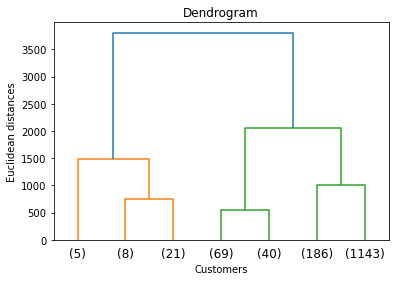

In [20]:
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm 
#itself of hierarchical clustering and then in linkage we have to 
#specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"), p=7, truncate_mode='lastp')
plt.title('Dendrogram')
plt.xlabel('# of observations')
plt.ylabel('Euclidean distances')
plt.show()

We can profile our clusterization by embedding data to 2 components:

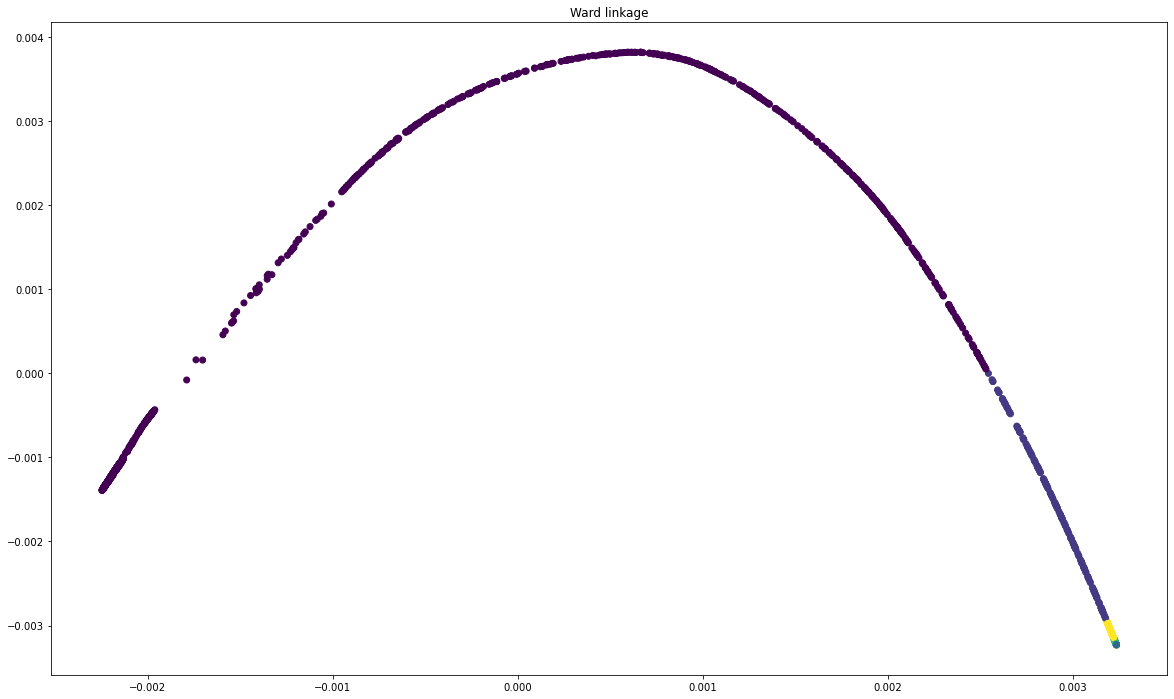

In [35]:
from sklearn import manifold

X_embedded = manifold.SpectralEmbedding(n_components=2).fit_transform(data)

plt.figure(figsize=(20, 12))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = labels)
plt.title("Ward linkage")
plt.show()

We can use elbow method to estimate quality of clusterization

In [65]:
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    model = AgglomerativeClustering(n_clusters=k).fit(data)
    model.fit(data)
    distortions.append(sum(np.min(cdist(data, model.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(model.inertia_)
    mapping1[k] = sum(np.min(cdist(coord, model.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = model.inertia_
    
for key, val in mapping1.items():
    print(f'{key} : {val}')

import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Среднее расстояние до центра кластера')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.show()

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

In [39]:
data.drop('CALL_SMS_OUT_CNT_R', axis=1, inplace=True)

In [40]:
df = pd.read_spss(r'C:\Users\zolotarev\Downloads\Telco_Segm_2.sav')
charge = df['CHARGE']
charge

0        434.40
1        234.98
2        381.60
3       2936.40
4       3632.00
         ...   
1467     326.40
1468    2409.00
1469    2875.98
1470    1667.40
1471     883.52
Name: CHARGE, Length: 1472, dtype: float64

In [45]:
clusterized_data = pd.concat([data, charge, pd.Series(labels)], axis=1)
clusterized_data

,LOG_CALLS_CNT,LOG_SMS_CNT,LOG_DATA_TRAFFIC_MB,LOG_CALL_SMS_OUT_CNT_R,CHARGE,0
0,2.503791,2.454845,2.371306,1.322240,434.40,0
1,2.374748,2.371068,2.371068,-3.000000,234.98,0
2,2.913284,2.460898,2.371068,-3.000000,381.60,0
3,3.461948,3.542203,3.769534,0.700314,2936.40,0
4,3.326541,2.959518,4.832665,1.508917,3632.00,0
...,...,...,...,...,...,...
1467,2.469822,2.646404,2.371068,-3.000000,326.40,0
1468,3.175222,2.980003,4.311307,1.778158,2409.00,1
1469,3.487845,2.968016,4.752391,1.135416,2875.98,0
1470,2.885926,2.611723,4.752026,1.480740,1667.40,0


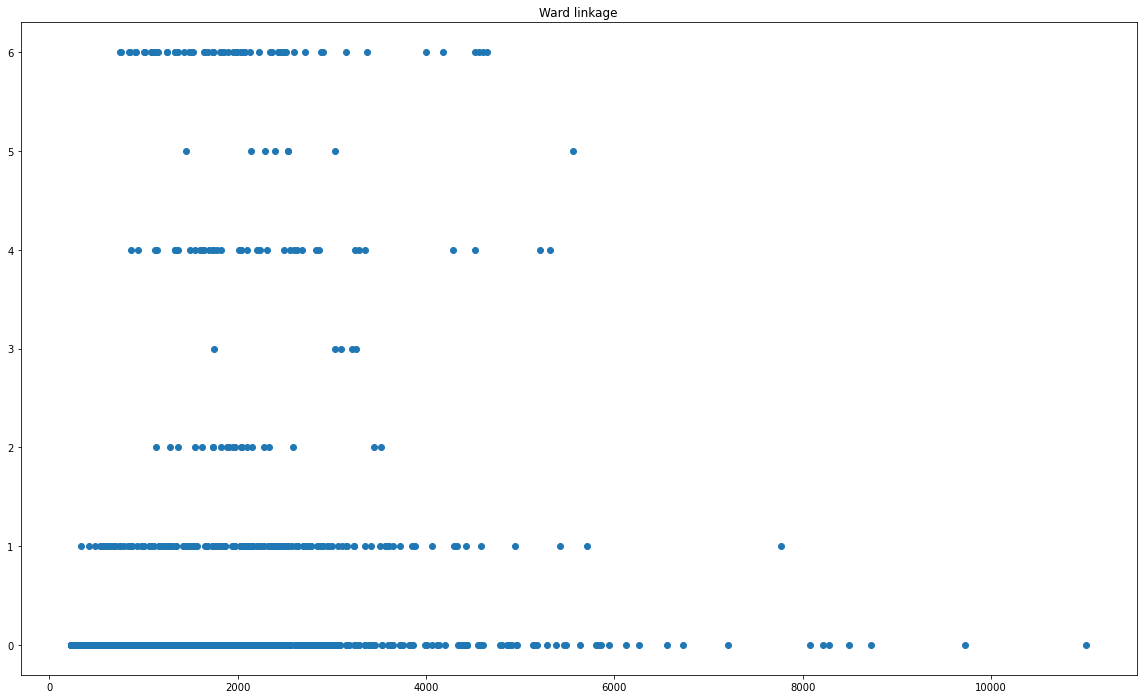

In [47]:
plt.figure(figsize=(20, 12))
plt.scatter(clusterized_data['CHARGE'], labels)
plt.title("Ward linkage")
plt.show()

In [ ]:
ax = sns.boxplot(x="CHARGE", y=0, data=clusterized_data)

There is no high dependency between cluster number and distribution of CHARGE variable

# Predictive modeling
* Select 2 clusters with highest average CHARGE.
* Create a flag variable for these clusters and use it as a target variable to build a model to predict that a subscriber belongs to these clusters.
* Build model on balanced sample.
* Analyze the results, model's accuracy on the train and test samples.

In [49]:
clusterized_data.groupby(0).CHARGE.agg(['mean'])

,mean
0,
0,1492.597390
1,2084.733763
2,2023.031429
3,2871.881333
4,2274.819000
5,2745.162500
6,2044.749855


Suchwise, clusters with highest mean CHARGE are 3 and 5. Let's take them:

In [51]:
clf_data = clusterized_data[(clusterized_data[0]==3) | (clusterized_data[0]==5)]
clf_data

,LOG_CALLS_CNT,LOG_SMS_CNT,LOG_DATA_TRAFFIC_MB,LOG_CALL_SMS_OUT_CNT_R,CHARGE,0
100,3.927422,3.517064,2.371068,2.733037,5566.400000,5
170,3.388279,2.834421,4.695250,2.835057,2538.600000,5
380,3.839038,2.598791,2.371068,3.018701,3219.806667,3
457,3.236285,2.781755,3.600925,2.773055,2535.800000,5
554,3.759441,3.150142,4.999243,2.707571,2291.500000,5
762,3.483016,2.954725,4.703694,2.795881,1450.000000,5
798,3.249687,2.756636,2.371068,2.725912,2397.600000,5
801,3.510947,2.728354,4.093989,2.949878,1746.000000,3
806,3.536432,3.484727,3.818080,2.727135,3033.800000,5
944,3.678063,3.188928,4.885972,2.987667,3099.400000,3


In [52]:
clf_data['class'] = 0
clf_data.loc[clf_data[0]==5, 'class'] = 1
clf_data

<ipython-input-52-8e52d2ae8efd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clf_data['class'] = 0
C:\Users\zolotarev\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,LOG_CALLS_CNT,LOG_SMS_CNT,LOG_DATA_TRAFFIC_MB,LOG_CALL_SMS_OUT_CNT_R,CHARGE,0,class
100,3.927422,3.517064,2.371068,2.733037,5566.400000,5,1
170,3.388279,2.834421,4.695250,2.835057,2538.600000,5,1
380,3.839038,2.598791,2.371068,3.018701,3219.806667,3,0
457,3.236285,2.781755,3.600925,2.773055,2535.800000,5,1
554,3.759441,3.150142,4.999243,2.707571,2291.500000,5,1
762,3.483016,2.954725,4.703694,2.795881,1450.000000,5,1
798,3.249687,2.756636,2.371068,2.725912,2397.600000,5,1
801,3.510947,2.728354,4.093989,2.949878,1746.000000,3,0
806,3.536432,3.484727,3.818080,2.727135,3033.800000,5,1
944,3.678063,3.188928,4.885972,2.987667,3099.400000,3,0


<AxesSubplot:ylabel='Frequency'>

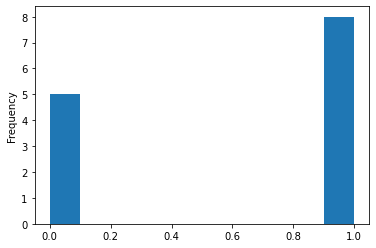

In [58]:
clf_data['class'].plot.hist()

It seems to be pretty balanced. Will not make any balancing operations. Let's build Logistic regression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(clf_data[['LOG_CALL_SMS_OUT_CNT_R', 'LOG_CALLS_CNT', 'LOG_SMS_CNT', 'LOG_DATA_TRAFFIC_MB']],
                                                  clf_data['class'], random_state=23102021)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((9, 4), (4, 4), (9,), (4,))

In [62]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_val, y_val)

0.25

In [64]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



In [63]:
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.25      0.40         4

    accuracy                           0.25         4
   macro avg       0.50      0.12      0.20         4
weighted avg       1.00      0.25      0.40         4



C:\Users\zolotarev\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zolotarev\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zolotarev\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can observe quite satisfying results on train dataset and very poor quality on test dataset. It can be explained with very low size of both clusters and lack of cross-validation in process of model building.